#  __Assignment-4__ 

Name: <span style="color:orange">  **Anantha Padmanabhan M Nair** </span>

Roll No: <span style="color:orange"> **2011019**</span>



In [57]:
import numpy as np
import scipy as sp
import math as m
import prettytable as pt
import Library_asgn4 as lib

<hr>

# Question-1

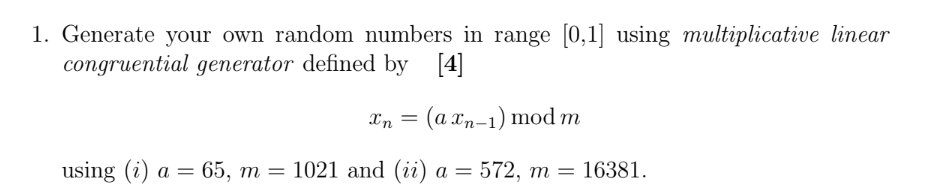

### Initializing the RNG Class with different a and m as mentioned in the Question

In [58]:
rng_1 = lib.rng(seed=11,a=65,m=1021,c=0)
rng_2 = lib.rng(seed=11,a=572,m=16381,c=0)

### Generating the Random Numbers

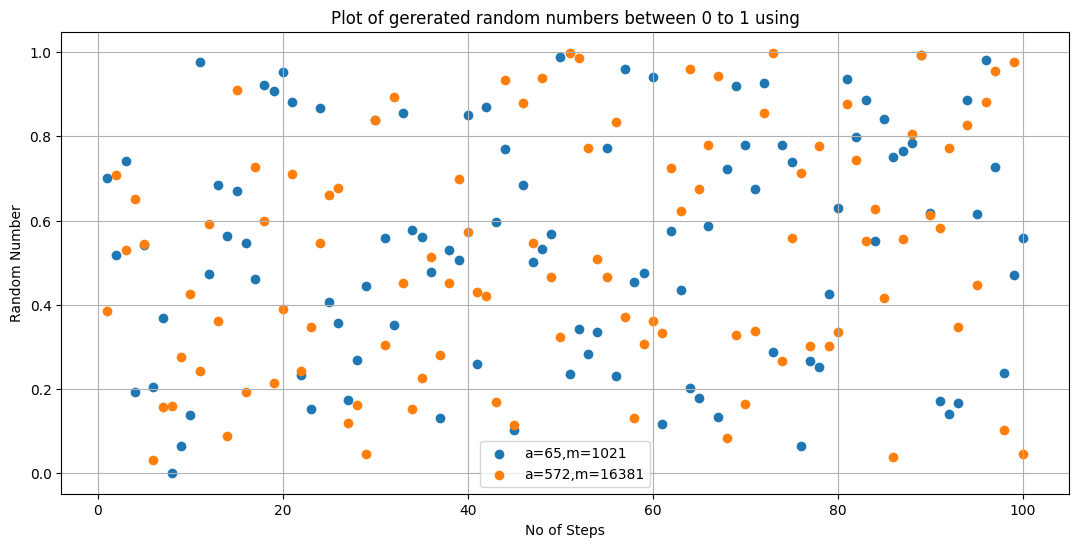

In [59]:
xlist = [i for i in range(1,101)]
ylist_1 = [rng_1.gen() for i in range(1,101)]
ylist_2 = [rng_2.gen() for i in range(1,101)]

import matplotlib.pyplot as plt
plt.figure(figsize=(13,6))
plt.scatter(xlist,ylist_1,label='a=65,m=1021')
plt.scatter(xlist,ylist_2,label='a=572,m=16381')
plt.xlabel('No of Steps')
plt.ylabel('Random Number')
plt.title('Plot of gererated random numbers between 0 to 1 using LCG')
plt.legend()
plt.grid()
plt.show()

<hr>

# Question-2


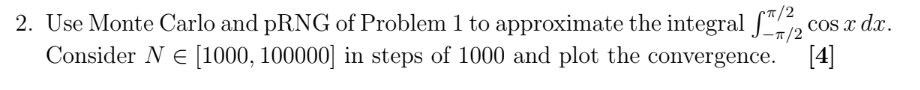

#### Calculating the integral using the Monte Carlo Method

In [60]:
def f(x):
    return np.cos(x)


x_min = -np.pi/2
x_max = np.pi/2

I = lib.monte_carlo_integrate(f,x_min,x_max,10000,17,multiplier=572,m=16381,c=0)
print("The value of integral is ",I, "using 10000 points")    

The value of integral is  2.0065394710490914 using 10000 points


#### Plotting the convergence of the numerical value of the integral with the number of random numbers generated

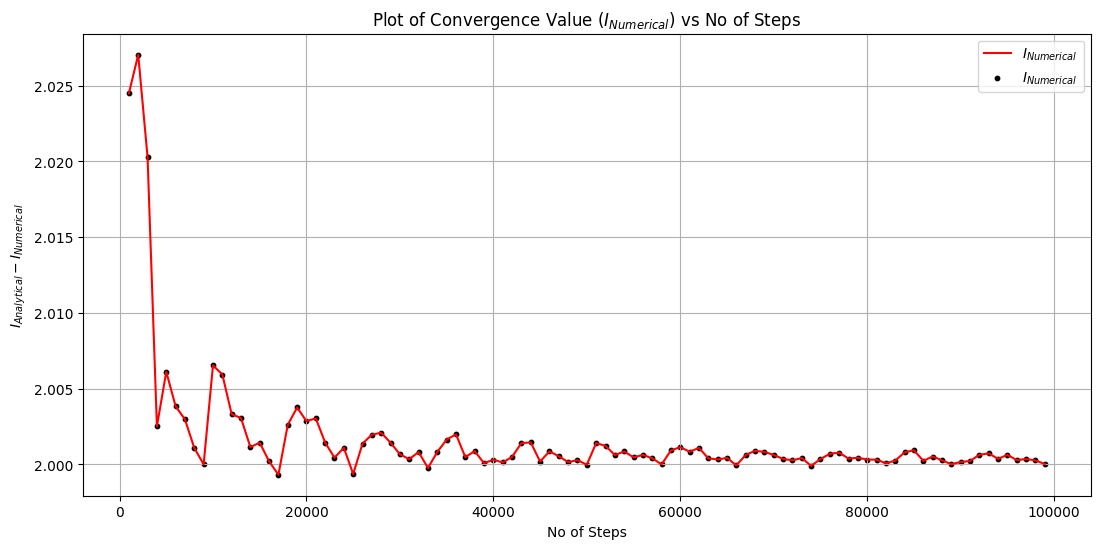

In [61]:
xlist = []
ylist = []
import matplotlib.pyplot as plt
plt.figure(figsize=(13,6))
for i in range(1000,100000,1000):
    xlist.append(i)
    ylist.append(abs(lib.monte_carlo_integrate(f,x_min,x_max,i,17,multiplier=572,m=16381,c=0)))

plt.plot(xlist,ylist,label=r'$I_{Numerical}$',color='red')
plt.scatter(xlist,ylist,label=r'$I_{Numerical}$',color='black',s=10)
plt.xlabel('No of Steps')
plt.ylabel(r'$I_{Analytical} - I_{Numerical}$')
plt.title(r'Plot of Convergence Value ($I_{Numerical}$) vs No of Steps')
plt.legend()
plt.grid()
plt.show()

<hr>

# Question-3


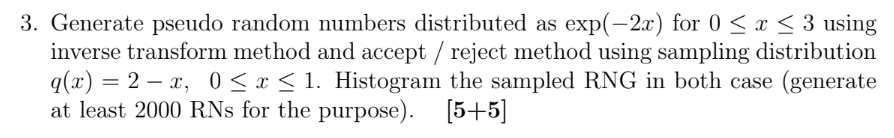

## Answer:


### Using the Inverse Transform Method

The given probability distribution function:
\begin{equation}
q(y) = \exp{(-2y)}
\end{equation}

Our range is from 0 to 3. so the known uniform distribution is given by p(x) = 1/3.

Using the inverse transform method we get.
\begin{equation}
|q(y)dy| = |p(x)dx|
\end{equation}


\begin{equation}
\int_{0}^{y} \exp{(-2y')} dy' = \int_{0}^{x} \frac{1}{3} dx
\end{equation}


On solving, we get:
\begin{equation}
y = -\frac{1}{2} \ln(|1-\frac{2x}{3}|)
\end{equation} 



where x is the random number generated from the uniform distribution. and y is the random number converted to the exponential distribution given in the question.

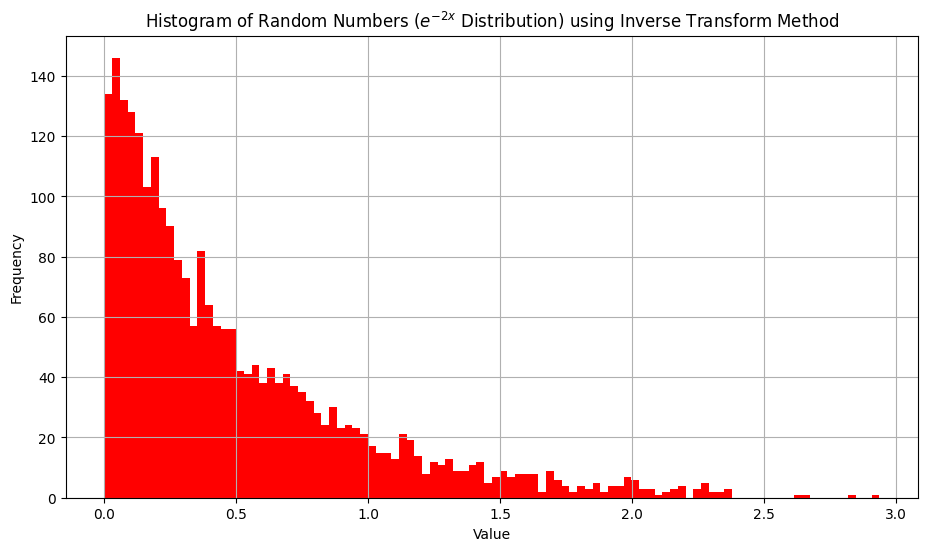

In [62]:
# Defining the distribution function
def f(x):
    return np.exp(-2*x)

# Defining the inverse of the distribution function
def f_inv(x):
    return -0.5*np.log(abs(1-(2*x/3)))


# Initialising the RNG
rng = lib.rng(seed = 17)


# Storing the generated random numbers
rng_list = []
for i in range(2500):
    p= 3*rng.gen()
    if f_inv(p)<3:
        rng_list.append(f_inv(p))


# Plotting the histogram
import matplotlib.pyplot as plt
plt.figure(figsize=(11,6))
plt.hist(rng_list, bins=100,color='red')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title(r'Histogram of Random Numbers ($e^{-2x}$ Distribution) using Inverse Transform Method')
plt.grid()
plt.show()

### Using Acceptance-Rejection Method

The given sampling function is:
\begin{equation}
g(x) = 2-x \text{ with } 0 \leq x \leq 1
\end{equation}


The target distribution is:
\begin{equation}
f(x) = e^{-2x} \text{ with } 0 \leq x \leq 3
\end{equation}

The ratio of the two functions is:
\begin{equation}
\frac{f(x)}{g(x)} = \frac{e^{-2x}}{2-x} \leq 1/2
\end{equation}

So,  $c=1/2$



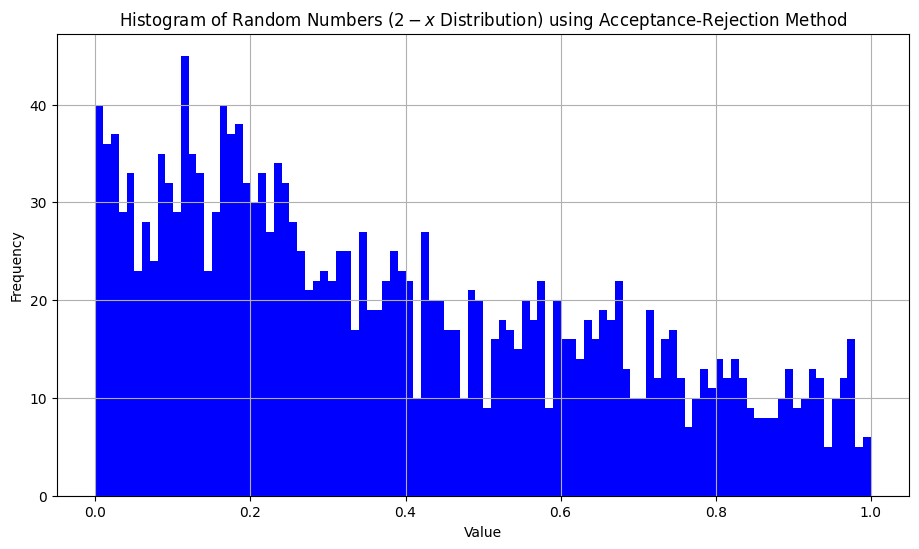

In [63]:
rng_1 = lib.rng(seed=19) # for x
rng_2 = lib.rng(seed=13) # for u

rng_list = []

def f(x):
    return np.exp(-2*x)

def g(x):
    return 2-x


while True:
    x= rng_1.gen()
    u= rng_2.gen()
    test = f(x)/((0.5)*g(x))
    if u<=test:
        rng_list.append(x)
    if len(rng_list)==2000:
        break
    
        
import matplotlib.pyplot as plt
plt.figure(figsize=(11,6))
plt.hist(rng_list, bins=100,color='b')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title(r'Histogram of Random Numbers ($2-x$ Distribution) using Acceptance-Rejection Method')
plt.grid()
plt.show()


<hr>

# Question-4

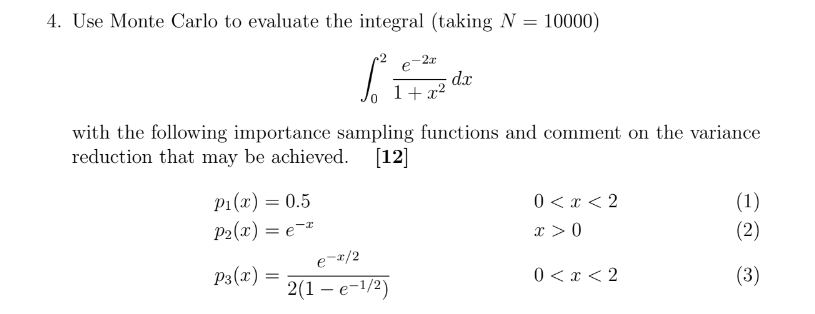

## Answer:

- $p_1(x) = 1/2$ for $0<x<2$


This is just a Uniform distribution from 0 to 2. So we can generate a random number from 0 to 2 and use it as the random number for the given distribution. The change of the interval from (0,1) to (0,2) is already done in the function taht is called.

In [64]:
def f(x):
    return np.exp(-2*x)/(1+x**2)

Integral = lib.monte_carlo_integrate(f,0,2,10000,19)
print("The value of integral is ",np.round(Integral,6), "using p_1 points")

The value of integral is  0.398935 using p_1 points


- $p_2(x) = e^{-x}$ for $x>0$

Here the RNG follows an exponential decay distribution. So we have to modify the random numbers generated to follow the exponential distribution. We can use the inverse transform method to do this.


ON solving for the inverse transform we get:
\begin{equation}
y = -\ln(1-x)
\end{equation}

where x is the random number generated from the uniform distribution.

In [65]:
# Definfing the function to find the value of the integral
def f(x):
    return np.exp(-2*x)/(1+x**2)

# Defininf the limits of the integral
x_min = 0
x_max = 2

# Initialising the uniform RNG
N = 10000
uni_rng = lib.rng(seed = 19)
sum = 0
for i in range(N):
    x = uni_rng.gen()
    x=-np.log(abs(1-x))
    transform = ((x_max-x_min)*(x))+x_min
    sum+=(x_max - x_min)*f(transform)/N

integral_p2 = sum
print("The value of integral is ",np.round(integral_p2,6), r"using p_2(x)")

The value of integral is  0.33938 using p_2(x)


- $p_3 (x) = \frac{e^{-2x}}{2(1+e^{-1/2})}$

Similarly proceeding with the inverse transform method we get the inverse transform as:
\begin{equation}
y = -2 \ln(|(1-e^{-1/2})x - 1|)
\end{equation} 

where x is the random number generated from the uniform distribution.


In [66]:
# Definfing the function to find the value of the integral
def f(x):
    return np.exp(-2*x)/(1+x**2)

# Defininf the limits of the integral
x_min = 0
x_max = 2

# Initialising the uniform RNG
N = 10000
uni_rng = lib.rng(seed = 19)
sum = 0
for i in range(N):
    x = uni_rng.gen()
    x=-2*np.log(abs((1-np.exp(-0.5))*x - 1))
    transform = ((x_max-x_min)*(x))+x_min
    sum+=(x_max - x_min)*f(transform)/N

integral_p2 = sum
print("The value of integral is ",np.round(integral_p2,6), r"using p_3(x)")

The value of integral is  0.464736 using p_3(x)


So, we can see that the minimum variance reduction is for the first distribution as it is a uniform distribution. We are aware that in order to minimize variance, the function being integrated should closely approximate the probability density function p(x), from which samples are taken.

<hr>